# Example notebook: Decision boundary

In this notebook we demonstrate how to create a boundary plot for the variational classifier applied to the Iris dataset.

In [1]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

from tno.quantum.ml.classifiers.vc import VariationalClassifier
from tno.quantum.ml.datasets import get_iris_dataset

cmap = ListedColormap(["#FF0000", "#0000FF"])

In [2]:
# Get the first two features and two classes from the Iris dataset
X_training, y_training, X_validation, y_validation = get_iris_dataset(
    n_features=2, n_classes=2, random_seed=0
)

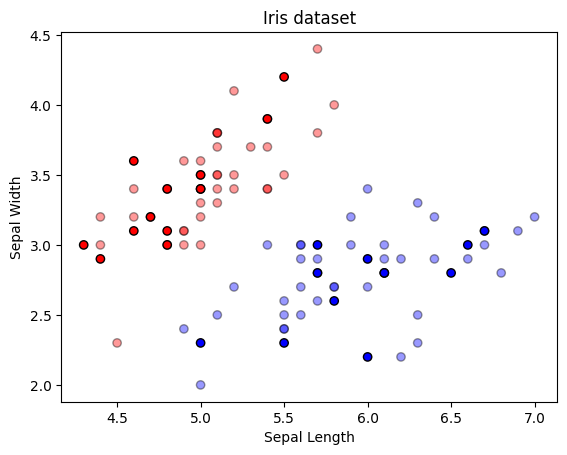

In [3]:
# Plot the dataset
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(
    X_training[:, 0],
    X_training[:, 1],
    c=y_training,
    cmap=cmap,
    edgecolors="k",
    alpha=0.4,
)

ax.scatter(
    X_validation[:, 0],
    X_validation[:, 1],
    c=y_validation,
    cmap=cmap,
    edgecolors="k",
)

ax.set_title("Iris dataset")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")

# Display the plot
plt.show()

In [4]:
def create_decision_boundary_plot(
    classifier: Pipeline, iteration: int, grid_resolution: int = 50, show: bool = True
) -> None:
    """Create a decision boundary plot

    Args:
        classifier: fitted Pipeline containing the VariationalClassifier
        iteration: Label being used for text and naming image file
        grid_resolution: grid resolution
        show: Whether to show plot

    Saves plot in images/ folder
    """
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Plot decision boundary
    DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_training,
        cmap=plt.cm.RdBu,
        alpha=0.8,
        ax=ax,
        eps=0.5,
        grid_resolution=grid_resolution,
    )

    # Plot the dataset
    ax.scatter(
        X_training[:, 0],
        X_training[:, 1],
        c=y_training,
        cmap=cmap,
        edgecolors="k",
        alpha=0.4,
    )

    ax.scatter(
        X_validation[:, 0],
        X_validation[:, 1],
        c=y_validation,
        cmap=cmap,
        edgecolors="k",
    )
    ax.text(
        ax.get_xlim()[0] + 0.1,
        ax.get_ylim()[1] - 0.2,
        f"Iteration: {iteration}",
        size=14,
    )

    ax.set_title("Iris dataset")
    ax.set_xlabel("Sepal Length")
    ax.set_ylabel("Sepal Width")

    # Save image so an GIF-image can be created
    plt.savefig(f"images/image-{iteration}.png")
    if show == True:
        plt.show()
    else:
        plt.close()

In [5]:
# Create a classifier instance
vc = VariationalClassifier(
    batch_size=10,
    backend={"name": "default.qubit", "options": {}},
    model={
        "name": "expected_values_model",
        "options": {"n_layers": 2, "n_trainable_sublayers": 2, "scaling": 0.3},
    },
    optimizer={"name": "adam", "options": {}},
    use_bias=False,
    random_init=True,
    warm_init=False,
    random_state=2,
)
classifier = make_pipeline(StandardScaler(), vc)

Training iteration: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


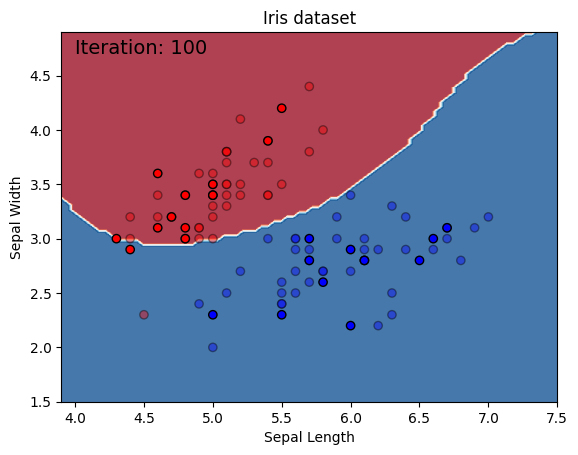

In [6]:
num_iterations = 100
classifier.fit(X_training, y_training, variationalclassifier__n_iter=num_iterations)
create_decision_boundary_plot(classifier, iteration=num_iterations, grid_resolution=80, show=True)

In [7]:
def create_decision_boundary_gif(num_iterations: int, grid_resolution: int = 50) -> None:
    """Create decision boundary gif

    Args:
        num_iterations: Total number of iterations
        grid_resolution: grid resolution

    Saves gif (and its frames) in images/ folder
    """
    vc = VariationalClassifier(
        batch_size=10,
        backend={"name": "default.qubit", "options": {}},
        model={
            "name": "expected_values_model",
            "options": {"n_layers": 2, "n_trainable_sublayers": 2, "scaling": 0.3},
        },
        optimizer={"name": "adam", "options": {}},
        use_bias=False,
        random_init=True,
        warm_init=True,
        random_state=2,
    )
    classifier = make_pipeline(StandardScaler(), vc)

    images = []
    for itt in range(0, num_iterations, 5):
        classifier.fit(X_training, y_training, variationalclassifier__n_iter=5)
        create_decision_boundary_plot(classifier, itt, grid_resolution, False)
        images.append(imageio.imread(f"images/image-{itt}.png"))
    for _ in range(5):
        images.append(images[-1])
    imageio.mimsave("images/decision_boundary.gif", images, duration=0.5)

In [8]:
create_decision_boundary_gif(num_iterations=150, grid_resolution = 80)

C:\Users\wezemanrs\Desktop\projects\Quantum-projects\toolbox-examples\venv\lib\site-packages\tno\quantum\ml\classifiers\vc\variational_classifier.py:160: UserWarning: The warm_init keyword is set to True, but the fit method has not been called before. Fitting will be performed for the first time.
  warnings.warn(
Training iteration: 100%|███████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.15it/s]


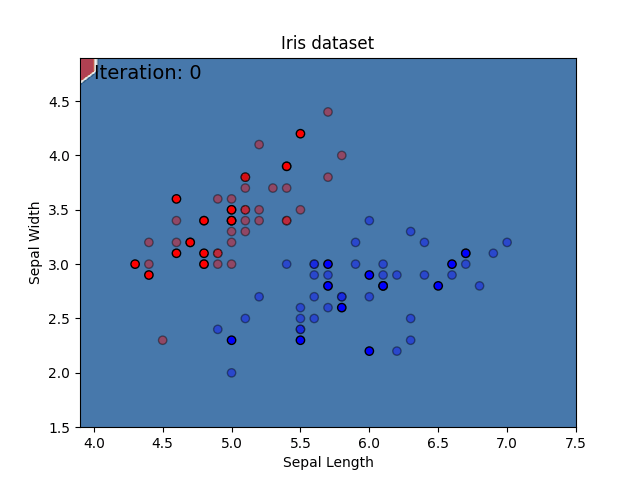

In [9]:
Image(filename='images/decision_boundary.gif')